<a href="https://colab.research.google.com/github/lucas-allves/projects_public/blob/master/Previs%C3%A3o_dos_n%C3%ADveis_de_glicose_no_sangue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Previsão dos níveis de glicose no sangue - Estudo sobre Machine Learning**

Este projeto tem como objetivo aplicar uma técnica de Machine Learning, a REGRESSÃO, um tipo de aprendizado supervisionado. A variável alvo normalmente em valores contínuos.

Queremos ajustar uma linha aos dados e, em duas dimensões, isso assume a forma de `y =ax + b`. O uso de um única *features* é conhecido como regressão linear simples, onde y é o alvo, x é o recurso e a e b são os parâmetros do modelo que queremos aprender. a e b também são chamados de coeficientes do modelo, ou inclinação e intercepto, respectivamente.

Quando temos duas *features*, x1 e x2, e um alvo, y, uma linha assume a forma `y = a1x1 + a2x2 + b`. Então, para ajustar um modelo de regressão linear, especificamos três variáveis, a1, a2, e o intercepto, b. Ao adicionar mais recursos, é conhecido como regressão linear múltipla.

### Visualização do conjunto de dados como um DataFrame

Para conceituar problemas de regressão, vamos usar um conjunto de dados contendo dados de saúde da mulher para prever os níveis de glicose no sangue. 

Carregamos o conjunto de dados como um DataFrame pandas e imprimimos as primeiras cinco linhas utilizando `head()` e para obter as principais informações utilizaremos `info()`. Ele contém recursos como:
- `pregnancies`: número de gestações; 
- `triceps`: medidas de dobra cutânea tricipital; 
- `insulin`: níveis de insulina; 
- `bmi`: índice de massa corporal (IMC); 
- `age`: idade em anos; 
- `diabetes`: status de diabetes( 1: indicando diagnóstico e 0: representando a ausência de diagnóstico).

In [2]:
import pandas as pd
import numpy as np

diabetes_df = pd.read_csv("diabetes_clean.csv")
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Ao olhar para os dados, vimos que não apresena valores faltantes (NaN) importante para a aplicação do algoritmo, além do tipo de cada *features* encontra-se de maneira apropriada.

### Criando arrays de recursos e alvos

`Scikit-learn` requer recursos e valores de destino em variáveis ​​distintas, `X` e `y`. 

Para usar todos os recursos em nosso conjunto de dados, descartamos nosso alvo, os níveis de glicose no sangue e armazenamos o atributo de valores como X. 

Para y, tomamos o atributo de valores da coluna de destino.

*Obs.: Verificando a forma de y e X, vemos que ambos são arrays unidimensionais. Isso é bom para y, mas nossos recursos devem ser formatados como um array bidimensional para serem aceitos pelo scikit-learn.*

In [27]:
# Cria X a partir dos valores da coluna
X = diabetes_df.drop('glucose', axis = 1).values

X_bmi = X[:, 6]

# Cria y a partir dos valores da coluna de glicose
y = diabetes_df['glucose'].values

# Remodelar X
X_bmi = X_bmi.reshape(-1, 1)

# Verificando a forma dos recursos e destinos
print(X_bmi.shape, y.shape)


(768, 1) (768,)


### Construindo um modelo de regressão linear

Agora que você criou seus arrays de recursos e alvos, você treinará um modelo de regressão linear em todos os valores de recursos e alvos.

Como o objetivo é avaliar a relação entre o recurso e os valores de destino, não há necessidade de dividir os dados em conjuntos de treinamento e teste.

In [28]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Criando o modelo
reg = LinearRegression()

# Treinando o modelo com os dados
reg.fit(X_bmi, y)

# Fazendo as previsões
predictions = reg.predict(X_bmi)

print(predictions[:5])

[132.90106428 119.28912038 120.00553848 112.12493938 120.72195658]


### Plotando glicose vs. índice de massa corporal (bmi)

Agora que você construiu seu modelo de regressão linear e o treinou usando as observações disponíveis, você pode visualizar o quão bem o modelo se ajusta aos dados.

Podemos ver que, geralmente, à medida que o índice de massa corporal aumenta, os níveis de glicose no sangue também tendem a aumentar.

Obs.: uma sugestão seria aplicar para cada *features* e analisar o comportamento do nível de glicose em relação as mesmas.

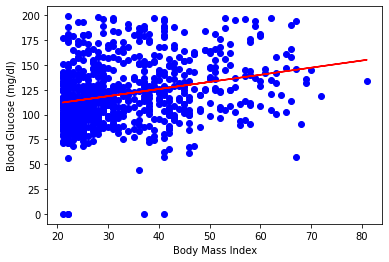

In [29]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Criando scatter plot
plt.scatter(X_bmi, y, color="blue")

# Criando line plot
plt.plot(X_bmi, predictions, color="red")
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")

# Exibindo o gráfico
plt.show()

A linha vermelha representa o ajuste do modelo de regressão linear dos valores de glicose no sangue em relação ao índice de massa corporal, que parece ter uma correlação positiva fraca a moderada.

Obs.: pode-se construir outros gráficos `scatter plot` e visualmente analisar as relações entre os recursos com a variável dependente (alvo). Até mesmo criar um `heatmap` para visualiza a força de correlação.

### Regressão linear usando todos os recursos

Depois de avaliar por regressão linear como as variáveis se relaciona, criaremos um modelo de regressão linear múltipla usando todos os recursos do conjunto de dados `diabetes_df`.

Vamos realizar uma regressão linear para prever os níveis de glicose no sangue usando todos os recursos do conjunto de dados de diabetes.

Em seguida, dividimos os dados em conjuntos de treinamento e teste, instanciamos o modelo, ajustamos no conjunto de treinamento e prevemos no conjunto de teste.

In [40]:
from sklearn.model_selection import train_test_split

# Criando as matrizes X e y
X = diabetes_df.drop('glucose', axis = 1).values
y = diabetes_df['glucose'].values

# Separando os dados em teste e treino

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instanciando o modelo
reg = LinearRegression()

# Treinando o modelo aos dados
reg.fit(X_train, y_train)

# Fazendo as previsões
y_pred = reg.predict(X_test)
print("Previsões: {} ".format(y_pred[:4]))
print("Valores atuais: {}".format(y_test[:4]))

Previsões: [119.91303675  95.70325357 104.63962314 114.05040231] 
Valores atuais: [ 98 112 108 107]


### Desempenho de regressão

Agora que você ajustou um modelo, reg, usando todos os recursos do sales_df e fez previsões de valores de vendas, pode avaliar o desempenho usando algumas métricas de regressão comuns.

In [36]:
# Importando mean_squared_error
from sklearn.metrics import mean_squared_error

# Calculando R-squared
r_squared = reg.score(X_test, y_test)

# Calculando RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Imprimindo as métricas
print("R²: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R²: 0.28280468810375115
RMSE: 26.341459582232265


### Validação cruzada para R-quadrado

A validação cruzada é uma abordagem vital para avaliar um modelo. Ele maximiza a quantidade de dados disponíveis para o modelo, pois o modelo não é apenas treinado, mas também testado em todos os dados disponíveis.
Iremos construir um modelo de regressão linear e, em seguida, usaremos a validação cruzada de 6 vezes para avaliar sua precisão na previsão da glicose em relação aos recursos.

In [9]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score, KFold

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv=kf)

# Print scores
print(cv_scores)
print(np.mean(cv_scores), np.std(cv_scores))
print(np.quantile(cv_scores, [0.025, 0.975]))

[0.37915966 0.29257178 0.38953015 0.22314647 0.3677666  0.31175482]
0.3273215793495466 0.05844544156906045
[0.23182464 0.38823384]


### Regressão regularizada

#### RIDGE

Agora vamos explorar a regularização em regressão, uma técnica usada para evitar o *overfitting*.

O primeiro tipo de regressão regularizada que veremos é chamado `ridge`. Ao usar `ridge`, precisamos escolher o valor alfa para ajustar e prever.

Para realizar a regressão de `ridge` no scikit-learn, importamos `ridge` de `sklearn.linear_model`. 

Para destacar o impacto de diferentes valores de alfa, criamos uma lista vazia para nossas pontuações e, em seguida, percorremos uma lista de diferentes valores de alfa.

In [14]:
# Import Ridge

from sklearn.linear_model import Ridge

alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)
  
  # Fit the data
  ridge.fit(X_train, y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)
print(ridge_scores)

[0.2828466623222221, 0.28320633574804777, 0.2853000732200006, 0.26423984812668133, 0.19292424694100963, 0.1768272855049816]


De acordo com a análise de regulação, vemos que o desempenho piora à medida que o alfa aumenta.

### Regressão regularizada

#### LASSO

Existe outro tipo de regressão regularizada chamada `lasso`, onde nossa função de perda é a função de perda OLS mais o valor absoluto de cada coeficiente multiplicado por alguma constante, alfa. A regressão Lasso pode realmente ser usada para avaliar a importância do recurso.

Para usar Lasso, importamos de `sklearn.linear_model`. O método real para realizar a regressão de laço no scikit-learn espelha a regressão de `Ridge`.

[-0.40402074  0.11406488 -0.28396674  0.09134391  0.33226837  0.
  0.48960536 23.63264431]


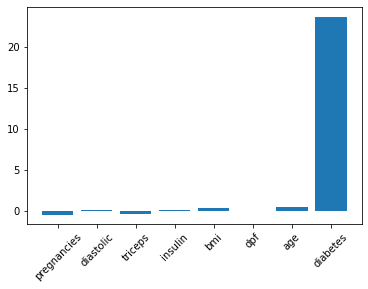

In [26]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values
names = diabetes_df.drop('glucose', axis=1).columns

lasso.fit(X, y)

# Compute and print the coefficients

lasso_coef = lasso.coef_
print(lasso_coef)
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()

Podemos ver que o preditor mais importante para nossa variável-alvo, os níveis de glicose no sangue, é o valor binário para saber se um indivíduo tem diabetes ou não! Isso não é surpreendente, mas é uma ótima verificação de sanidade. Esse tipo de seleção de recursos é muito importante porque nos permite comunicar resultados para públicos não técnicos. Também é útil para identificar quais fatores são preditores importantes para vários fenômenos físicos.